In [1]:
import tensorflow as tf
from tensorflow import keras
(train_data, train_targets), (test_data, test_targets) =keras.datasets.boston_housing.load_data()

In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

In [3]:
test_data -= mean
test_data /= std

데이터 표준화하기

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [24]:
model = models.Sequential()
# Regularizer 더하기
# https://keras.io/api/layers/regularizers/
model.add(layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(0.1), input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [26]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [27]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
checkpoint_filepath = './temp/checkpoint'
mc = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', mode='min', 
                     save_weights_only=True, save_best_only=True)

In [28]:
adam = tf.keras.optimizers.Adam(learning_rate=0.1)

In [29]:
model.compile(optimizer=adam, loss='mse')

In [30]:
history = model.fit(train_data, train_targets, validation_split=0.2, epochs=200, batch_size=32, callbacks=[es, mc])

Epoch 1/200
11/11 [==============================] - 0s 16ms/step - loss: 431.6947 - val_loss: 335.9711
Epoch 2/200
11/11 [==============================] - 0s 8ms/step - loss: 148.7997 - val_loss: 54.4624
Epoch 3/200
11/11 [==============================] - 0s 7ms/step - loss: 78.8681 - val_loss: 52.8306
Epoch 4/200
11/11 [==============================] - 0s 8ms/step - loss: 54.8687 - val_loss: 51.4357
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 44.8712 - val_loss: 55.9093
Epoch 6/200
11/11 [==============================] - 0s 6ms/step - loss: 49.7229 - val_loss: 42.0547
Epoch 7/200
11/11 [==============================] - 0s 6ms/step - loss: 30.9000 - val_loss: 30.4508
Epoch 8/200
11/11 [==============================] - 0s 3ms/step - loss: 24.6249 - val_loss: 31.0905
Epoch 9/200
11/11 [==============================] - 0s 4ms/step - loss: 24.6837 - val_loss: 35.2778
Epoch 10/200
11/11 [==============================] - 0s 7ms/step - loss: 22.2286 - val

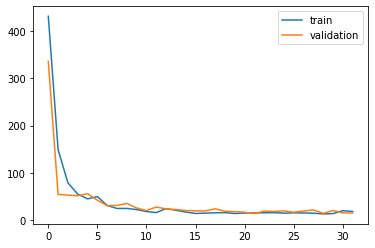

In [31]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [32]:
model.load_weights(checkpoint_filepath)

In [33]:
y_pred = model.predict(test_data)

4/4 [==============================] - 0s 998us/step


In [34]:
from sklearn.metrics import r2_score
r2_score(test_targets, y_pred)

0.8404199238469278

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_targets, y_pred)**0.5

3.6447303996406246